In [1]:
import pandas as pd
prices = pd.read_csv("data/sample_prices.csv")

In [2]:
prices

,BLUE,ORANGE
0,8.7000,10.6600
1,8.9055,11.0828
2,8.7113,10.7100
3,8.4346,11.5907
4,8.7254,12.1070
5,9.0551,11.7876
6,8.9514,11.2078
7,9.2439,12.5192
8,9.1276,13.3624
9,9.3976,14.4080


In [3]:
returns = prices.pct_change()
returns

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249


<AxesSubplot:>

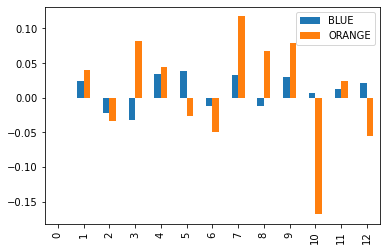

In [4]:
returns.plot.bar()

In [5]:
returns = returns.dropna()

In [6]:
returns

,BLUE,ORANGE
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249
10,0.006151,-0.168261


In [7]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [8]:
deviations = returns - returns.mean()
deviations

,BLUE,ORANGE
1,0.013621,0.029662
2,-0.031807,-0.043638
3,-0.041763,0.072232
4,0.024477,0.034544
5,0.027786,-0.036381
6,-0.021452,-0.059187
7,0.022677,0.107008
8,-0.022581,0.057353
9,0.019581,0.068250
10,-0.003849,-0.178261


In [19]:
number_of_obs = returns.shape[0]
squared_deviations = deviations**2
variance = squared_deviations.sum()/(number_of_obs -1)
volatility = variance**0.5

In [20]:
volatility

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [21]:
variance = squared_deviations.mean()
volatility = variance**0.5
volatility

BLUE      0.022957
ORANGE    0.076212
dtype: float64

In [22]:
returns.std()*np.sqrt(12)

BLUE      0.083060
ORANGE    0.275747
dtype: float64

In [23]:
returns = pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv",
                     header = 0, index_col = 0, parse_dates = True, na_values = -99.99
                     )

In [25]:
returns.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [26]:
columns = ['Lo 10', 'Hi 10']
returns = returns[columns]
returns.head()

,Lo 10,Hi 10
192607,-1.45,3.29
192608,5.12,3.70
192609,0.93,0.67
192610,-4.84,-2.43
192611,-0.78,2.70


In [27]:
returns = returns / 100

In [28]:
returns.head()

,Lo 10,Hi 10
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


In [29]:
returns.columns = ['SmallCap', 'LargeCap']

In [30]:
returns.head()

,SmallCap,LargeCap
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


<AxesSubplot:>

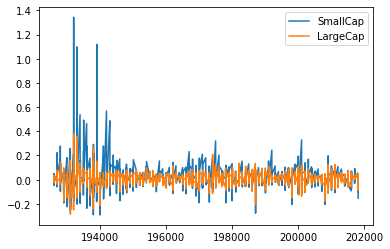

In [31]:
returns.plot.line()

In [32]:
returns.std()

SmallCap    0.106288
LargeCap    0.053900
dtype: float64

In [33]:
annualized_vol = returns.std()*np.sqrt(12)

In [34]:
annualized_vol

SmallCap    0.368193
LargeCap    0.186716
dtype: float64

In [37]:
n_months = returns.shape[0]
returns_per_month = (returns + 1).prod()**(1/n_months)-1
returns_per_month

SmallCap    0.012986
LargeCap    0.007423
dtype: float64

In [39]:
annualized_returns = (returns_per_month+1)**12-1
annualized_returns

SmallCap    0.167463
LargeCap    0.092810
dtype: float64

In [40]:
annualized_returns = (returns +1).prod()**(12/n_months)-1
annualized_returns

SmallCap    0.167463
LargeCap    0.092810
dtype: float64

In [41]:
annualized_returns / annualized_vol

SmallCap    0.454825
LargeCap    0.497063
dtype: float64

In [42]:
riskfree_rate = 0.03
excess_returns = annualized_returns - riskfree_rate
sharpe_ratio = excess_returns / annualized_vol
sharpe_ratio

SmallCap    0.373346
LargeCap    0.336392
dtype: float64

In [43]:
"Small cap is superier to large cap during the period of 1926 - 2018"

'Small cap is superier to large cap during the period of 1926 - 2018'

In [45]:
returns = pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv",
                     header = 0, index_col = 0, parse_dates = True, na_values = -99.99
                     )

In [46]:
columns = ['Qnt 2', 'Qnt 3', 'Qnt 4']
returns = returns [columns]
returns.head()

,Qnt 2,Qnt 3,Qnt 4
192607,0.59,1.60,1.47
192608,3.59,3.71,1.61
192609,-1.40,0.00,-0.50
192610,-4.10,-2.89,-3.36
192611,2.18,3.41,3.39


<AxesSubplot:>

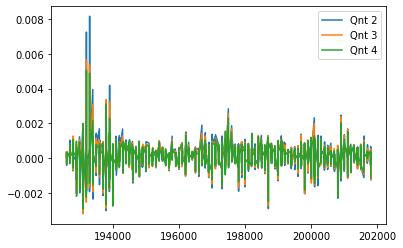

In [65]:
returns = returns * 100
returns.plot.line()

In [66]:
annualized_vol_qn = returns.std() * np.sqrt(12)
n_month = returns.shape[0]
annualized_returns_qn = (returns + 1).prod() ** (12/n_month) - 1
annualized_returns_qn / annualized_vol_qn

Qnt 2    0.541099
Qnt 3    0.567820
Qnt 4    0.579014
dtype: float64

In [67]:
annualized_returns_qn

Qnt 2    0.001486
Qnt 3    0.001386
Qnt 4    0.001282
dtype: float64

In [58]:
sharpe_ratio_qn = (annualized_returns_qn - 0.03) / annualized_vol_qn

In [59]:
sharpe_ratio_qn

Qnt 2   -1091.689050
Qnt 3   -1228.132570
Qnt 4   -1353.908764
dtype: float64

In [61]:
annualized_returns_qn

Qnt 2    0.000015
Qnt 3    0.000014
Qnt 4    0.000013
dtype: float64